**INTRO**

Normalmente los proyectos que involucren datos, siempre van a requerir  uno o varios pasos desde la recepeción hasta su almacenamiento, normalmente son llamadas orquestación de tareas.

**QUE ES UN PIPELINE**

La arquitectura en pipeline (tuberia) consiste en ir transformando un flujo de datos en un proceso comprendido por varias fases secuenciales.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Pipeline%2C_4_stage_with_bubble.svg/1024px-Pipeline%2C_4_stage_with_bubble.svg.png"
     width="400"
     height="341"/>


**QUE ES UN PIPELINE DE DATOS**

Una pipeline de datos es una construcción lógica que representa un proceso dividido en fases. Las pipelines de datos se caracterizan por definir el conjunto de pasos o fases y las tecnologías involucradas en un proceso de movimiento o procesamiento de datos.


<img src="https://camo.githubusercontent.com/ca0548f659082636ccd1629925c0f419c986fd37/68747470733a2f2f70616e6f706c792e696f2f75706c6f6164732f76657273696f6e732f6469616772616d342d2d2d782d2d2d2d3735302d333238782d2d2d2e6a7067"
     width="750"
     height="300"/>




**QUE ES UN PIPELINE DE DEVOPS**


Un pipeline de DevOps es un conjunto de procesos y herramientas automatizados que permite a los desarrolladores y profesionales de operaciones colaborar en la creación e implementación de código en un entorno de producción.


<img src="https://www.quartech.com/wp-content/uploads/2018/11/devops-pipeline.png"
     width="750"
     height="328"/>





**FLUJO DE CIENCIA DE DATOS**


Un flujo de trabajo de ciencia de datos típico y simplificado desearía


1.   Obtén los datos de entrenamiento
2.   Limpiar / preprocesar / transformar los datos
3.   Entrena un modelo de aprendizaje automático
4.   Evaluar y optimizar el modelo
5.   Limpiar / preprocesar / transformar nuevos datos
6.   Ajuste el modelo a datos nuevos para hacer predicciones.

<img src="https://miro.medium.com/max/2805/0*IT9aLhgbOVDkMNKM"
     width="400"
     height="400"/>




**QUE ES UN PIPELINE DE SKLEARN**

La ejecución del flujo de trabajo es similar a una pipeline, es decir, la salida de los primeros pasos se convierte en la entrada del segundo paso. Scikit-learn es una herramienta poderosa para el machine learning, proporciona una función para manejar tales tuberías en el sklearn.pipelinemódulo llamado Pipeline, basicamente pará trabajos de ML en Python. 


<img src="https://www.researchgate.net/publication/334565019/figure/fig1/AS:782364141690881@1563541555043/The-Auto-Sklearn-pipeline-12-contains-three-main-building-blocks-a-Data.png"
     width="750"
     height="300"/>


**DOCUMENTACIÓN OFICIAL**



1.  [Descripción Pipeline](https://scikit-learn.org/stable/modules/compose.html)
2.  [Descripción Clase](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)








**DICCIONARIO**





**DEMO BASICO**

In [1]:
! pip install -q https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [2]:
!pip install -q --upgrade scikit-learn

In [23]:
# librerias

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml                         
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import estimator_html_repr

from pandas_profiling import ProfileReport       
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV  
from sklearn import set_config

warnings.filterwarnings('ignore')


In [4]:
titanic = fetch_openml("titanic", version=1, as_frame=True, return_X_y=False)

titanic.data.info()
titanic.data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(6), object(5)
memory usage: 115.4+ KB


pclass  ...                        home.dest
0     1.0  ...                     St Louis, MO
1     1.0  ...  Montreal, PQ / Chesterville, ON
2     1.0  ...  Montreal, PQ / Chesterville, ON
3     1.0  ...  Montreal, PQ / Chesterville, ON
4     1.0  ...  Montreal, PQ / Chesterville, ON

[5 rows x 13 columns]

In [5]:
profile = ProfileReport(titanic.data, title="Monitoria Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**DICCIONARIO**


**IMPUTACION**: La palabra "imputar" significa un valor asignado a algo por inferencia del valor de los productos o procesos a los que contribuye. En estadística, la imputación es el proceso de reemplazar los datos faltantes con valores sustituidos.






In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer

valores_actuales = sum(map(lambda data: 1 if data == True else 0, list(np.isnan(titanic.data['age']))))

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(titanic.data[['age']])

valores_despues = sum(map(lambda data: 1 if data == True else 0, list(np.isnan(imputer.transform(titanic.data[['age']])))))

print("1. valores nulos del campo edad sin estandarizar          : --> ", valores_actuales)
print("2. valores nulos del campo edad despues de estandarizados : --> ", valores_despues)

1. valores nulos del campo edad sin estandarizar          : -->  263
2. valores nulos del campo edad despues de estandarizados : -->  0


In [7]:
from sklearn.preprocessing import LabelEncoder
labels = titanic.data[['sex','age']]

labelencoder = LabelEncoder()
labels["categoria"] = labelencoder.fit_transform(labels['sex'])
labels

sex      age  categoria
0     female  29.0000          0
1       male   0.9167          1
2     female   2.0000          0
3       male  30.0000          1
4     female  25.0000          0
...      ...      ...        ...
1304  female  14.5000          0
1305  female      NaN          0
1306    male  26.5000          1
1307    male  27.0000          1
1308    male  29.0000          1

[1309 rows x 3 columns]


Aunque la codificación de etiquetas es directa, tiene la desventaja de que los algoritmos pueden malinterpretar los valores numéricos como si tuvieran algún tipo de jerarquía, por eso se recomienda **OneHotEncoder**


In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore')
demo = titanic.data[['sex','age']]

df_etiquetado = pd.DataFrame(encoder.fit_transform(demo[['sex']]).toarray())
# merge with main df bridge_df on key values
df_etiquetado = demo.join(df_etiquetado)
df_etiquetado.head(5)

sex      age    0    1
0  female  29.0000  1.0  0.0
1    male   0.9167  0.0  1.0
2  female   2.0000  1.0  0.0
3    male  30.0000  0.0  1.0
4  female  25.0000  1.0  0.0

**PCA**


El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.




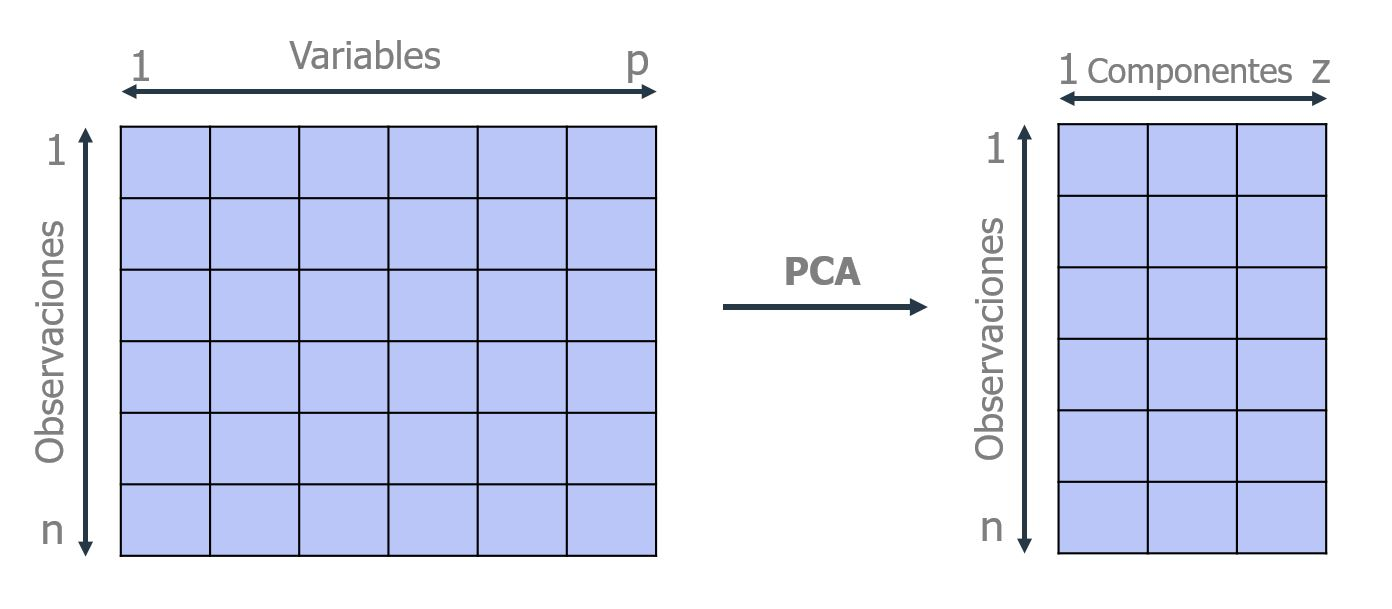





Al quitar variables estaríamos haciendo Reducción de Dimensiones. Al hacer Reducción de Dimensiones (las características) tendremos menos relaciones entre variables a considerar.

In [9]:
demo = titanic.data[['name','age', 'fare']]
demo['random_uno'] = np.random.randint(1, 3, demo.shape[0])
demo['random_dos'] = np.random.choice([6, 9, 12], demo.shape[0])
demo = demo.fillna(0)
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        1309 non-null   object 
 1   age         1309 non-null   float64
 2   fare        1309 non-null   float64
 3   random_uno  1309 non-null   int64  
 4   random_dos  1309 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 51.3+ KB


In [10]:
from sklearn.preprocessing import StandardScaler

# separando caracteristicas
caracteristicas = ['age', 'fare', 'random_uno','random_dos']
valores = demo.loc[:, caracteristicas].values

# scalado de dtos
scaler = StandardScaler()
valores = scaler.fit_transform(valores)
pd.DataFrame(valores, columns = caracteristicas).head(5)

age      fare  random_uno  random_dos
0  0.291313  3.442428   -0.982581   -1.234642
1 -1.305769  2.286606    1.017728    1.227120
2 -1.244163  2.286606    1.017728   -1.234642
3  0.348182  2.286606    1.017728   -1.234642
4  0.063835  2.286606   -0.982581   -0.003761

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
variables = pca.fit_transform(valores)
reducido = pd.DataFrame(variables, columns = ['reduccion_uno', 'reduccion_dos'])
reducido.head()

reduccion_uno  reduccion_dos
0       2.572471       0.337502
1       0.748352       0.033866
2       0.652409       1.716055
3       1.778058       1.723718
4       1.666605      -0.574249

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer  


# Numerical features in the data
caracteristicas_numericas = ['age', 'fare']

# categorical features in the data
caracteristicas_categoricas = ['embarked', 'sex', 'pclass']

In [13]:
# Acciones para transformaciones numericas
transformaciones_numericas = Pipeline(
    steps=[('inputacion', SimpleImputer()),('scalamiento', 'passthrough')]
)

# acciones para transformaciones categoricas
transformaciones_categoricas = Pipeline(
  steps=[
    ('inputacion', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))]
)

# transformacion de datos
transformador_datos = ColumnTransformer(
    transformers=[
        ('numericas', transformaciones_numericas, caracteristicas_numericas),
        ('categoricas', transformaciones_categoricas, caracteristicas_categoricas)]
)


# preprocesador
preprocesador = Pipeline(
  steps=[('transformador_datos', transformador_datos),
          ('reduccion_dimensionalidad', PCA())]
)

# clasificador
clasificador = Pipeline(
  steps=[('preprocessor', preprocesador),
  ('clasificador', LogisticRegression(random_state=0, max_iter=10000))]
)

# parametros para GridSearchCV
parametros = {
    'preprocessor__transformador_datos__numericas__inputacion__strategy': ['mean', 'median'],
    'preprocessor__transformador_datos__categoricas__inputacion__strategy': ['constant','most_frequent'],
    'preprocessor__transformador_datos__numericas__scalamiento': [StandardScaler(), RobustScaler(), MinMaxScaler()],
    'clasificador__C': [0.1, 1.0, 10, 100],
    'preprocessor__reduccion_dimensionalidad__n_components': [2, 5, 10],
    'clasificador__solver': ['liblinear','newton-cg', 'lbfgs','sag','saga']
}



In [14]:
# analizador de parametros del modelo
print(clasificador.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'clasificador', 'preprocessor__memory', 'preprocessor__steps', 'preprocessor__verbose', 'preprocessor__transformador_datos', 'preprocessor__reduccion_dimensionalidad', 'preprocessor__transformador_datos__n_jobs', 'preprocessor__transformador_datos__remainder', 'preprocessor__transformador_datos__sparse_threshold', 'preprocessor__transformador_datos__transformer_weights', 'preprocessor__transformador_datos__transformers', 'preprocessor__transformador_datos__verbose', 'preprocessor__transformador_datos__verbose_feature_names_out', 'preprocessor__transformador_datos__numericas', 'preprocessor__transformador_datos__categoricas', 'preprocessor__transformador_datos__numericas__memory', 'preprocessor__transformador_datos__numericas__steps', 'preprocessor__transformador_datos__numericas__verbose', 'preprocessor__transformador_datos__numericas__inputacion', 'preprocessor__transformador_datos__numericas__scalamiento', 'preprocessor__transf

In [15]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)

modelo = GridSearchCV(clasificador, param_grid=parametros)
modelo.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('transformador_datos',
                                                         ColumnTransformer(transformers=[('numericas',
                                                                                          Pipeline(steps=[('inputacion',
                                                                                                           SimpleImputer()),
                                                                                                          ('scalamiento',
                                                                                                           'passthrough')]),
                                                                                          ['age',
                                                                                           'fare']),
                                                                     

**VISUALIZADOR DEL PIPELINE**

In [16]:
# configuracion para la visualización del pipeline
set_config(display='diagram')

modelo.best_estimator_


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('transformador_datos',
                                  ColumnTransformer(transformers=[('numericas',
                                                                   Pipeline(steps=[('inputacion',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scalamiento',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'fare']),
                                                                  ('categoricas',
                                                                   Pipeline(steps=[('inputacion',
                                                                                    SimpleImputer(strategy='constant')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['embarked',
                                                                    'sex',
                                                                    'pclass'])])),
                                 ('reduccion_dimensionalidad',
                                  PCA(n_components=10))])),
                ('clasificador',
                 LogisticRegression(C=0.1, max_iter=10000, random_state=0,
                                    solver='newton-cg'))])

In [18]:
# Almacenando  Pipeline
with open('titanic_data_pipeline_estimator.html', 'w') as f:  
    f.write(estimator_html_repr(modelo.best_estimator_))

**EVALUACIÓN DEL MODELO**

In [21]:
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       203
           1       0.78      0.69      0.73       125

    accuracy                           0.81       328
   macro avg       0.80      0.78      0.79       328
weighted avg       0.81      0.81      0.81       328



In [26]:
modelo.score(X_test, y_test)

0.8079268292682927